## Extracting data from YouTube Data API v3 and analyzing it using pandas and seaborn

In [1]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import os

In [2]:
api_key=os.environ.get('YOUTUBE_API_KEY')
channel_ids = ["UCRXiA3h1no_PFkb1JCP0yMA" , "UCoEj4uRzynPXEEegNqMnJVw" , "UCgRQHK8Ttr1j9xCEpCAlgbQ"]

youtube = build('youtube', 'v3', developerKey=api_key)

## Function to get channel statistics

In [3]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
        part ='snippet,contentDetails,statistics',
        id = ','.join(channel_ids))
    response = request.execute()

    for i in range(len(response['items'])):
        data = dict(channel_name= response['items'][i]['snippet']['title'],
                   subscribers = response['items'][i]['statistics']['subscriberCount'],
                   views = response['items'][i]['statistics']['viewCount'],
                   total_videos = response['items'][i]['statistics']['videoCount'],
                   playlist_id = response['items'][i]['contentDetails']['relatedPlaylists'] ['uploads'])
        all_data.append(data)
    
    return all_data

In [4]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [5]:
channel_data = pd.DataFrame(channel_statistics)

In [6]:
channel_data

,channel_name,subscribers,views,total_videos,playlist_id
0,HauteLeMode,845000,205022287,867,UUoEj4uRzynPXEEegNqMnJVw
1,Vogue,14200000,4607852203,3430,UURXiA3h1no_PFkb1JCP0yMA
2,Variety,1410000,635627057,5409,UUgRQHK8Ttr1j9xCEpCAlgbQ


In [7]:
channel_data['subscribers'] = pd.to_numeric(channel_data['subscribers'])
channel_data['views'] = pd.to_numeric(channel_data['views'])
channel_data['total_videos'] = pd.to_numeric(channel_data['total_videos'])
channel_data.dtypes

channel_name    object
subscribers      int64
views            int64
total_videos     int64
playlist_id     object
dtype: object

## Looking at data of three different YouTube channels

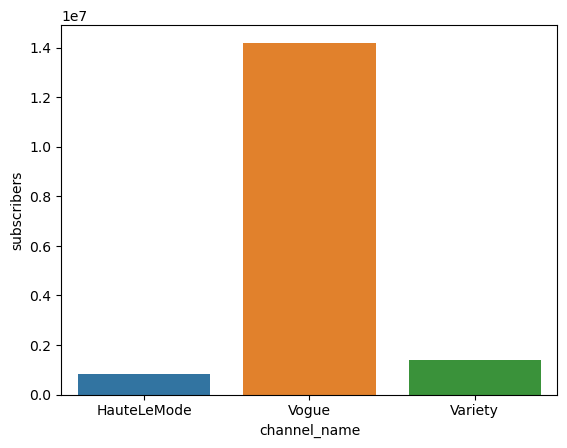

In [8]:
#sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x ='channel_name', y ='subscribers', data = channel_data)

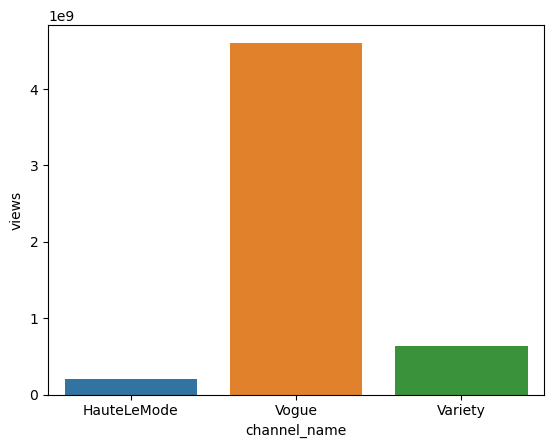

In [9]:
ax = sns.barplot(x ='channel_name', y ='views', data = channel_data)

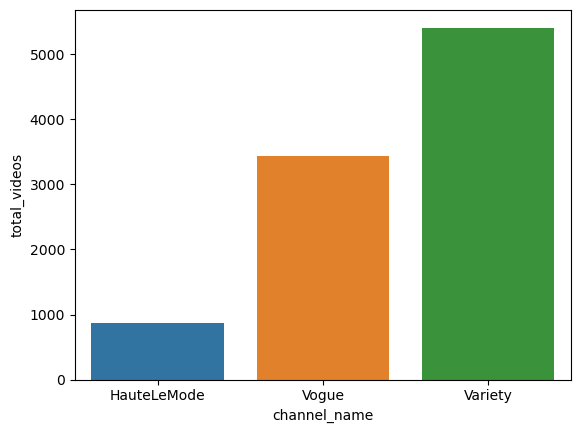

In [10]:
ax = sns.barplot(x ='channel_name', y ='total_videos', data = channel_data)

## Analysing data from videos of a particular channel

## Functionin to get Video IDs

In [11]:
channel_data

,channel_name,subscribers,views,total_videos,playlist_id
0,HauteLeMode,845000,205022287,867,UUoEj4uRzynPXEEegNqMnJVw
1,Vogue,14200000,4607852203,3430,UURXiA3h1no_PFkb1JCP0yMA
2,Variety,1410000,635627057,5409,UUgRQHK8Ttr1j9xCEpCAlgbQ


In [12]:
playlist_id = channel_data.loc[channel_data['channel_name'] == 'HauteLeMode', 'playlist_id'].iloc[0]

In [13]:
playlist_id

'UUoEj4uRzynPXEEegNqMnJVw'

In [14]:
def get_video_ids(youtube, playlist_id):
    request = youtube.playlistItems().list(
        part = 'contentDetails',
        playlistId = playlist_id,
        maxResults = 50
    )

    response = request.execute()

    video_ids = []
    
    for i in range(len(response['items'])):

        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response['nextPageToken']  
    more_pages = True

    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
            part = 'contentDetails',
            playlistId = playlist_id,
            maxResults = 50, 
            pageToken = next_page_token
            )

            response = request.execute()

            for i in range(len(response['items'])):

                video_ids.append(response['items'][i]['contentDetails']['videoId'])

            next_page_token = response.get('nextPageToken')
        
    return video_ids
    

In [15]:
video_ids = get_video_ids(youtube, playlist_id)
video_ids

['uzH9k2H9CzY',
 'KZ6EqNHXnCM',
 'yG3evfvw7Jk',
 'KRIa5HRVz0Q',
 '6Yugj7ebVXs',
 '-gS2up2pDAQ',
 '_UTjRviAGEU',
 'Qvd8pwBbDc8',
 '2zFgzu81wtM',
 'oZeX4H4DCTg',
 'TN6Ixg3B7xc',
 'cNqwY-M876Y',
 '4qNNJIw5L30',
 'YI77GytQS_M',
 'dkmH3KQjxZc',
 'qch4PNZvKws',
 'PShmXSa25sU',
 'BH75O5brVEA',
 'EjFAMYE22Hc',
 'CZMj3tZ0fbw',
 'oYxoEnJe70E',
 '3JiWO-YZCCc',
 'oMcmt1yKnRo',
 'XiCRr3Mii0c',
 '0oNodG3kfD0',
 '55-dWJvnm6g',
 'aCEknu9Td5A',
 'UYyPbSlj8Q8',
 'jxtLq7mJHBs',
 'VjGneVxgZzo',
 'QKcpn4UTXT4',
 'FqFjezOrcbA',
 '62Ltxg3ZJc8',
 'ml3YJh2Go_M',
 'Smfh-ITpjqQ',
 'a5nskcqfT-w',
 'hbnTw0hvDfM',
 '7MBYo2VL7PA',
 '374roPLmw7E',
 'rpe_pBmai_E',
 'dbOcm23L4sI',
 'WedNfWGDA4k',
 'wRZOk1u9Ln0',
 'ryWiOzjOBuc',
 '3TCZxpFAvcM',
 'maDdTnzUuzQ',
 '0fsbLkQQAJ8',
 'ZtFdJyt13UM',
 'PimkKuvfk6Y',
 'i-Y1K-JG06E',
 'QApvFrPlaSM',
 'FrcF64oP9bY',
 '3gpX1Eo0J-Y',
 '72T25hWlc04',
 'tW8a9MLwUE8',
 'bPuKmvYUJr8',
 '1RnhYy4ztww',
 '9EIPbJNV5hQ',
 'lZEqJ1xS6pw',
 'qwjfCCBumUU',
 'LrFN2IJIxtk',
 'UzA3GcLMi9s',
 '9BGepa

## Function to get video details

In [18]:
def get_video_details(youtube, video_ids):
    
    all_video_stats = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part = 'snippet, statistics',
            id = ','.join(video_ids[i:i+50])
            
        )
        response = request.execute()
        
        for video in response['items']:
            video_stats = dict( Title = video['snippet']['title'],
                              published_date = video['snippet']['publishedAt'],
                              views = video['statistics']['viewCount'],
                               likes = video['statistics']['likeCount'],
                               comments = video['statistics']['commentCount']
                              )
            all_video_stats.append(video_stats)
    
    return all_video_stats

In [20]:
video_details = get_video_details(youtube, video_ids)

In [21]:
video_data = pd.DataFrame(video_details)

In [26]:
video_data['published_date'] = pd.to_datetime(video_data['published_date']).dt.date
video_data['views'] = pd.to_numeric(video_data['views'])
video_data['likes'] = pd.to_numeric(video_data['likes'])
video_data['comments'] = pd.to_numeric(video_data['comments'])
video_data

,Title,published_date,views,likes,comments
0,Rihanna for Vogue China #fashion #vogue #rihanna,2024-03-26,79376,6921,99
1,REACTING TO THE AMBANI PRE-WEDDING CEREMONY FA...,2024-03-18,271580,8796,838
2,OSCARS AFTER PARTY FASHION ROAST 2024 PART 2 (...,2024-03-16,222519,7349,485
3,The new “It Girl” Phone Case is CASETiFY Essen...,2024-03-14,18226,560,29
4,THE NEW BRITISH VOGUE IS HERE #fashion #vogue,2024-03-14,114404,12343,163
...,...,...,...,...,...
818,Vintage and Vfiles Haul!,2015-05-19,980,36,4
819,Get To Know Me Tag!,2015-03-09,9482,355,35
820,NYFW Street Trend Report,2015-03-01,1125,40,6
821,Aruba Vacation!,2015-02-22,1253,38,6


In [29]:
top10_videos = video_data.sort_values(by='views',ascending = False).head(10)

In [30]:
top10_videos

,Title,published_date,views,likes,comments
298,Balenciaga Fall 2022 Haute Couture by Demna fe...,2022-07-06,5103975,290271,10153
305,Kim Kardashian & Ripley’s ruined Marilyn Monro...,2022-06-13,3329078,305952,8082
283,Was Dua Lipa wrong for wearing a white dress t...,2022-08-28,3233987,202333,3342
237,Sam Smith & Harry Styles Aren’t Wearing The Sa...,2022-12-12,2657265,182135,2760
518,Reacting to a REAL Crazy Rich Asians’ Closet (...,2019-11-19,2552221,50065,4545
109,AVAVAV Spring 2024 #fashion #style #viral,2023-09-25,2511983,159055,963
362,MET GALA 2021 FASHION ROAST (why can no one fo...,2021-09-15,2485468,66458,9317
297,Jean Paul Gaultier Fall 2022 by Olivier Rouste...,2022-07-07,2287861,96874,4007
315,MET GALA 2022 FASHION ROAST (how dare kim kard...,2022-05-03,2021422,62031,6864
27,ZENDAYA IS WEARING A PIECE OF ART AT THE DUNE ...,2024-02-15,1852978,137781,1249


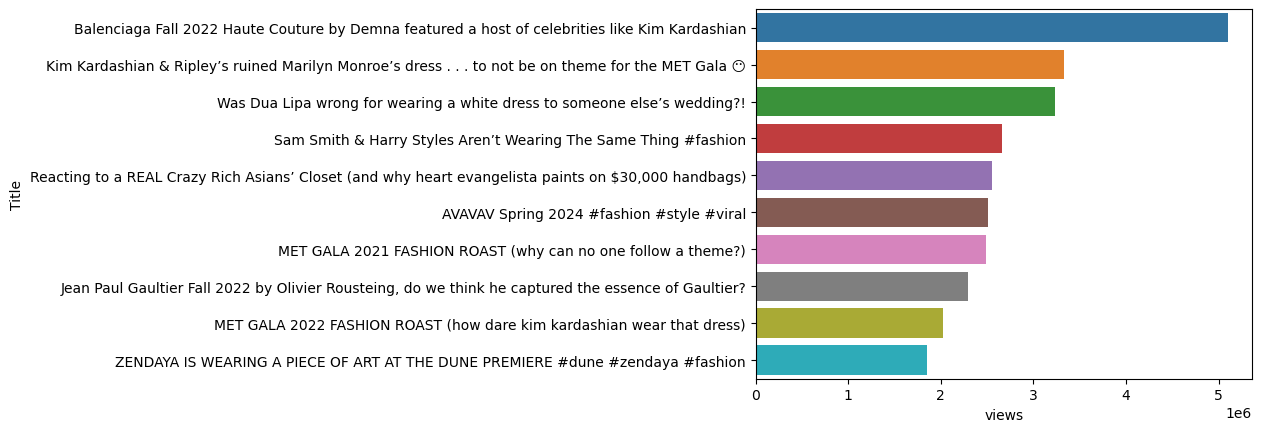

In [31]:
ax1 = sns.barplot(x='views', y='Title', data = top10_videos)

In [32]:
video_data

,Title,published_date,views,likes,comments
0,Rihanna for Vogue China #fashion #vogue #rihanna,2024-03-26,79376,6921,99
1,REACTING TO THE AMBANI PRE-WEDDING CEREMONY FA...,2024-03-18,271580,8796,838
2,OSCARS AFTER PARTY FASHION ROAST 2024 PART 2 (...,2024-03-16,222519,7349,485
3,The new “It Girl” Phone Case is CASETiFY Essen...,2024-03-14,18226,560,29
4,THE NEW BRITISH VOGUE IS HERE #fashion #vogue,2024-03-14,114404,12343,163
...,...,...,...,...,...
818,Vintage and Vfiles Haul!,2015-05-19,980,36,4
819,Get To Know Me Tag!,2015-03-09,9482,355,35
820,NYFW Street Trend Report,2015-03-01,1125,40,6
821,Aruba Vacation!,2015-02-22,1253,38,6


In [33]:
video_data['month'] = pd.to_datetime(video_data['published_date']).dt.strftime('%b')

In [34]:
video_data

,Title,published_date,views,likes,comments,month
0,Rihanna for Vogue China #fashion #vogue #rihanna,2024-03-26,79376,6921,99,Mar
1,REACTING TO THE AMBANI PRE-WEDDING CEREMONY FA...,2024-03-18,271580,8796,838,Mar
2,OSCARS AFTER PARTY FASHION ROAST 2024 PART 2 (...,2024-03-16,222519,7349,485,Mar
3,The new “It Girl” Phone Case is CASETiFY Essen...,2024-03-14,18226,560,29,Mar
4,THE NEW BRITISH VOGUE IS HERE #fashion #vogue,2024-03-14,114404,12343,163,Mar
...,...,...,...,...,...,...
818,Vintage and Vfiles Haul!,2015-05-19,980,36,4,May
819,Get To Know Me Tag!,2015-03-09,9482,355,35,Mar
820,NYFW Street Trend Report,2015-03-01,1125,40,6,Mar
821,Aruba Vacation!,2015-02-22,1253,38,6,Feb


In [37]:
videos_per_month = video_data.groupby('month', as_index= False).size()

In [38]:
videos_per_month

,month,size
0,Apr,51
1,Aug,55
2,Dec,60
3,Feb,88
4,Jan,95
5,Jul,71
6,Jun,63
7,Mar,76
8,May,52
9,Nov,52


In [39]:
sort_order = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun','Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [41]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['month'], categories = sort_order, ordered = True)

In [43]:
videos_per_month = videos_per_month.sort_index()

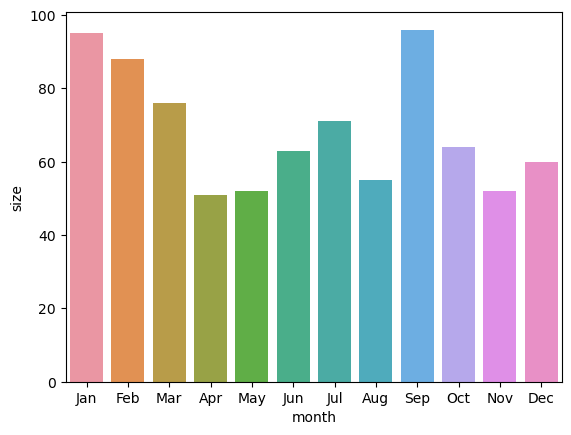

In [44]:
ax2 = sns.barplot(x = 'month', y ='size', data = videos_per_month )